In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv("zomato.csv")

# Scouting the data

In [3]:
df.shape

(51717, 17)

In [4]:
df.nunique() # It is not counting the 'nan' to make it count you have to use dropna=False

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [5]:
df_dup=df.copy() # Just creating a duplicate for further use.

In [6]:
df_dup.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
print(df["location"].unique())
print("Total unique Solution: ",len(df["location"].unique()))

['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanahalli' nan
 'CV Raman Nagar' 'Electronic City' 'HSR' 'Marathahalli' 'Sarjapur Road'
 'Wilson Garden' 'Shanti Nagar' 'Koramangala 5th Block'
 'Koramangala 8th Block' 'Richmond Road' 'Koramangala 7th Block'
 'Jalahalli' 'Koramangala 4th Block' 'Bellandur' 'Whitefield'
 'East Bangalore' 'Old Airport Road' 'Indiranagar' 'Koramangala 1st Block'
 'Frazer Town' 'RT Nagar' 'MG Road' 'Brigade Road' 'Lavelle Road'
 'Church Street' 'Ulsoor' 'Residency Road' 'Shivajinagar' 'Infantry Road'
 'St. Marks Road' 'Cunningham Road' 'Race Course Road' 'Commercial Street'
 'Vasanth Nagar' 'HBR Layout' 'Domlur' 'Ejipura' 'Jeevan Bhima Nagar'
 'Old Madras Road' 'Malleshwaram' 'Seshadripuram' 'Kammanahalli'
 'Koramangala 6th Block' 'Majestic' 'Langford Town' 'Central Bangalo

In [7]:
print("Online order(Yes): ",len(df[df["online_order"]=="Yes"]))
print("Online order(No): ",len(df[df["online_order"]=="No"]))
print("Book Table(Yes): ",len(df[df["book_table"]=="Yes"]))
print("Book Table(No): ",len(df[df["book_table"]=="No"]))


Online order(Yes):  30444
Online order(No):  21273
Book Table(Yes):  6449
Book Table(No):  45268


In [8]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [9]:
df["menu_item"].is_unique

False

# Removing unwanted Columns:

In [9]:
df=df.drop(['url', 'address', 'phone','menu_item'], axis=1) #Drop these column mentioned and axis=1 specifies that the column to be removed

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

In [11]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Checking for Null Value:

In [12]:
df.info() #Gives info about the Not-null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


# Changing the Datatype for Visualization and Removing or modifying null values

In [13]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
def handler(val):
    if(val=="NEW" or val=="-"): # Replacing NEW and - to nan so we can apply mean value to those.
        return np.nan
    val=str(val).split("/")[0]
    return float(val)
df["rate"]=df["rate"].apply(handler) #apply is similar to map function
df.head(5)


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [16]:
print(df["location"].isnull().sum())
df=df[df.location.notna()]
print(df["location"].isnull().sum())

21
0


In [17]:
print(df["rest_type"].isnull().sum())
df=df[df.rest_type.notna()]
print(df["rest_type"].isnull().sum())

206
0


In [18]:
print(df["cuisines"].isnull().sum())
df=df[df.cuisines.notna()]
print(df["cuisines"].isnull().sum())

24
0


In [19]:
df.rename(columns={"approx_cost(for two people)":"approx_cost","listed_in(type)":"listed_type","listed_in(city)":"listed_city"},inplace="True") # Renaming for convenience

In [20]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'listed_type', 'listed_city'],
      dtype='object')

In [21]:
print(df["approx_cost"].isnull().sum())
df["approx_cost"].unique()

318


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [22]:
def handle(val):
    val=str(val).split(",")
    if(len(val)==2): # Replacing NEW and - to nan so we can apply mean value to those.
        return float(val[0]+val[1])
    return float(val[0])
#print(handle("8,000"))
df["approx_cost"]=df["approx_cost"].apply(handle) #apply is similar to 
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,listed_type,listed_city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [23]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['approx_cost'].fillna(df['approx_cost'].mean(), inplace = True)
print(df["rate"].isnull().sum())
print(df["approx_cost"].isnull().sum())

0
0


C:\Users\jayak\AppData\Local\Temp\ipykernel_28460\3016266885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(), inplace = True)
C:\Users\jayak\AppData\Local\Temp\ipykernel_28460\3016266885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# Changing least count values to `other` for better Visualization

In [24]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Quick Bites                   19129
Casual Dining                 10326
Cafe                           3732
Delivery                       2595
Dessert Parlor                 2262
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [25]:
rest_types_1000_less=rest_types[rest_types<1000]
def less_than_1000(val):
    if(val in rest_types_1000_less):
        return 'others'
    else:
        return val
df['rest_type'] = df['rest_type'].apply(less_than_1000)
df['rest_type'].value_counts()

rest_type
Quick Bites           19129
Casual Dining         10326
others                 9092
Cafe                   3732
Delivery               2595
Dessert Parlor         2262
Takeaway, Delivery     2035
Casual Dining, Bar     1154
Bakery                 1141
Name: count, dtype: int64

In [26]:
cuisines = df['cuisines'].value_counts(ascending  = False)
cuisines_less_100 = cuisines[cuisines<100]
def cuisines_lessthan_100(value):
    if(value in cuisines_less_100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(cuisines_lessthan_100)
df['cuisines'].value_counts()

cuisines
others                                 26362
North Indian                            2899
North Indian, Chinese                   2361
South Indian                            1828
Biryani                                  909
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [27]:
location = df['location'].value_counts(ascending  = False)
location_less_300 = location[location<300]
def handle_loc(value):
    if(value in location_less_300):
        return 'others'
    else:
        return value
df['location'] = df['location'].apply(handle_loc)
df['location'].value_counts()

location
BTM                      5097
others                   4686
HSR                      2511
Koramangala 5th Block    2504
JP Nagar                 2222
Whitefield               2120
Indiranagar              2076
Jayanagar                1924
Marathahalli             1825
Bannerghatta Road        1624
Bellandur                1271
Electronic City          1249
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1141
Sarjapur Road            1057
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              904
Kalyan Nagar              844
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Brookefield               658
Banaswadi                 656
New BEL Road              646
Kammanahalli              643
Rajajinagar               591
Church Street             569
L

In [28]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,listed_type,listed_city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari


# Data Visualization based on Location of the Hotel

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, 'Banashankari'),
  Text(0, 1, 'Basavanagudi'),
  Text(0, 2, 'others'),
  Text(0, 3, 'Jayanagar'),
  Text(0, 4, 'JP Nagar'),
  Text(0, 5, 'Bannerghatta Road'),
  Text(0, 6, 'BTM'),
  Text(0, 7, 'Electronic City'),
  Text(0, 8, 'HSR'),
  Text(0, 9, 'Marathahalli'),
  Text(0, 10, 'Shanti Nagar'),
  Text(0, 11, 'Koramangala 5th Block'),
  Text(0, 12, 'Koramangala 8th Block'),
  Text(0, 13, 'Richmond Road'),
  Text(0, 14, 'Koramangala 7th Block'),
  Text(0, 15, 'Koramangala 4th Block'),
  Text(0, 16, 'Bellandur'),
  Text(0, 17, 'Sarjapur Road'),
  Text(0, 18, 'Whitefield'),
  Text(0, 19, 'Old Airport Road'),
  Text(0, 20, 'Indiranagar'),
  Text(0, 21, 'Koramangala 1st Block'),
  Text(0, 22, 'Frazer Town'),
  Text(0, 23, 'MG Road'),
 

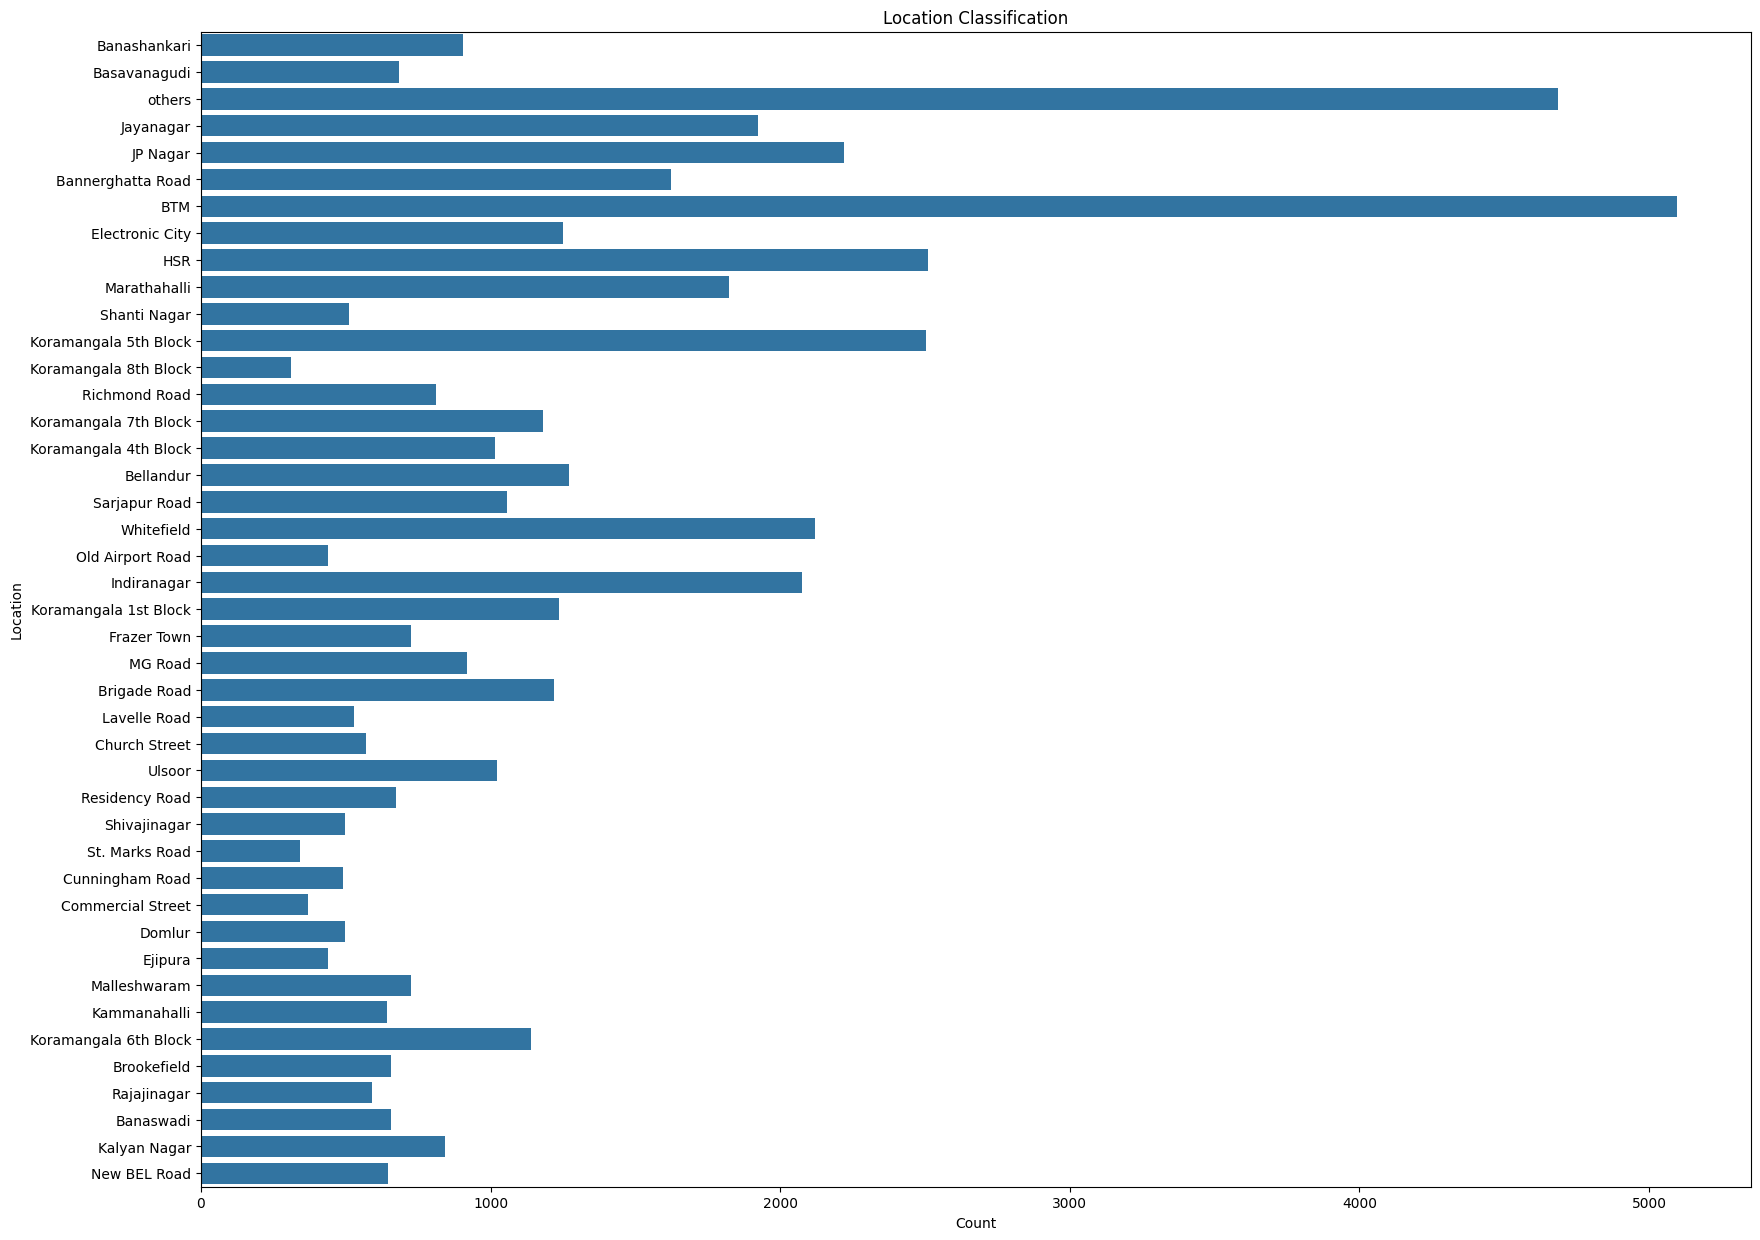

In [29]:
plt.figure(figsize = (20,15))
ax = sn.countplot(df['location'])
plt.title("Location Classification")
plt.xlabel("Count")
plt.ylabel("Location")
plt.yticks()

In [30]:
lis=df['location'].value_counts(ascending=False)
lis

location
BTM                      5097
others                   4686
HSR                      2511
Koramangala 5th Block    2504
JP Nagar                 2222
Whitefield               2120
Indiranagar              2076
Jayanagar                1924
Marathahalli             1825
Bannerghatta Road        1624
Bellandur                1271
Electronic City          1249
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1141
Sarjapur Road            1057
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              904
Kalyan Nagar              844
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Brookefield               658
Banaswadi                 656
New BEL Road              646
Kammanahalli              643
Rajajinagar               591
Church Street             569
L

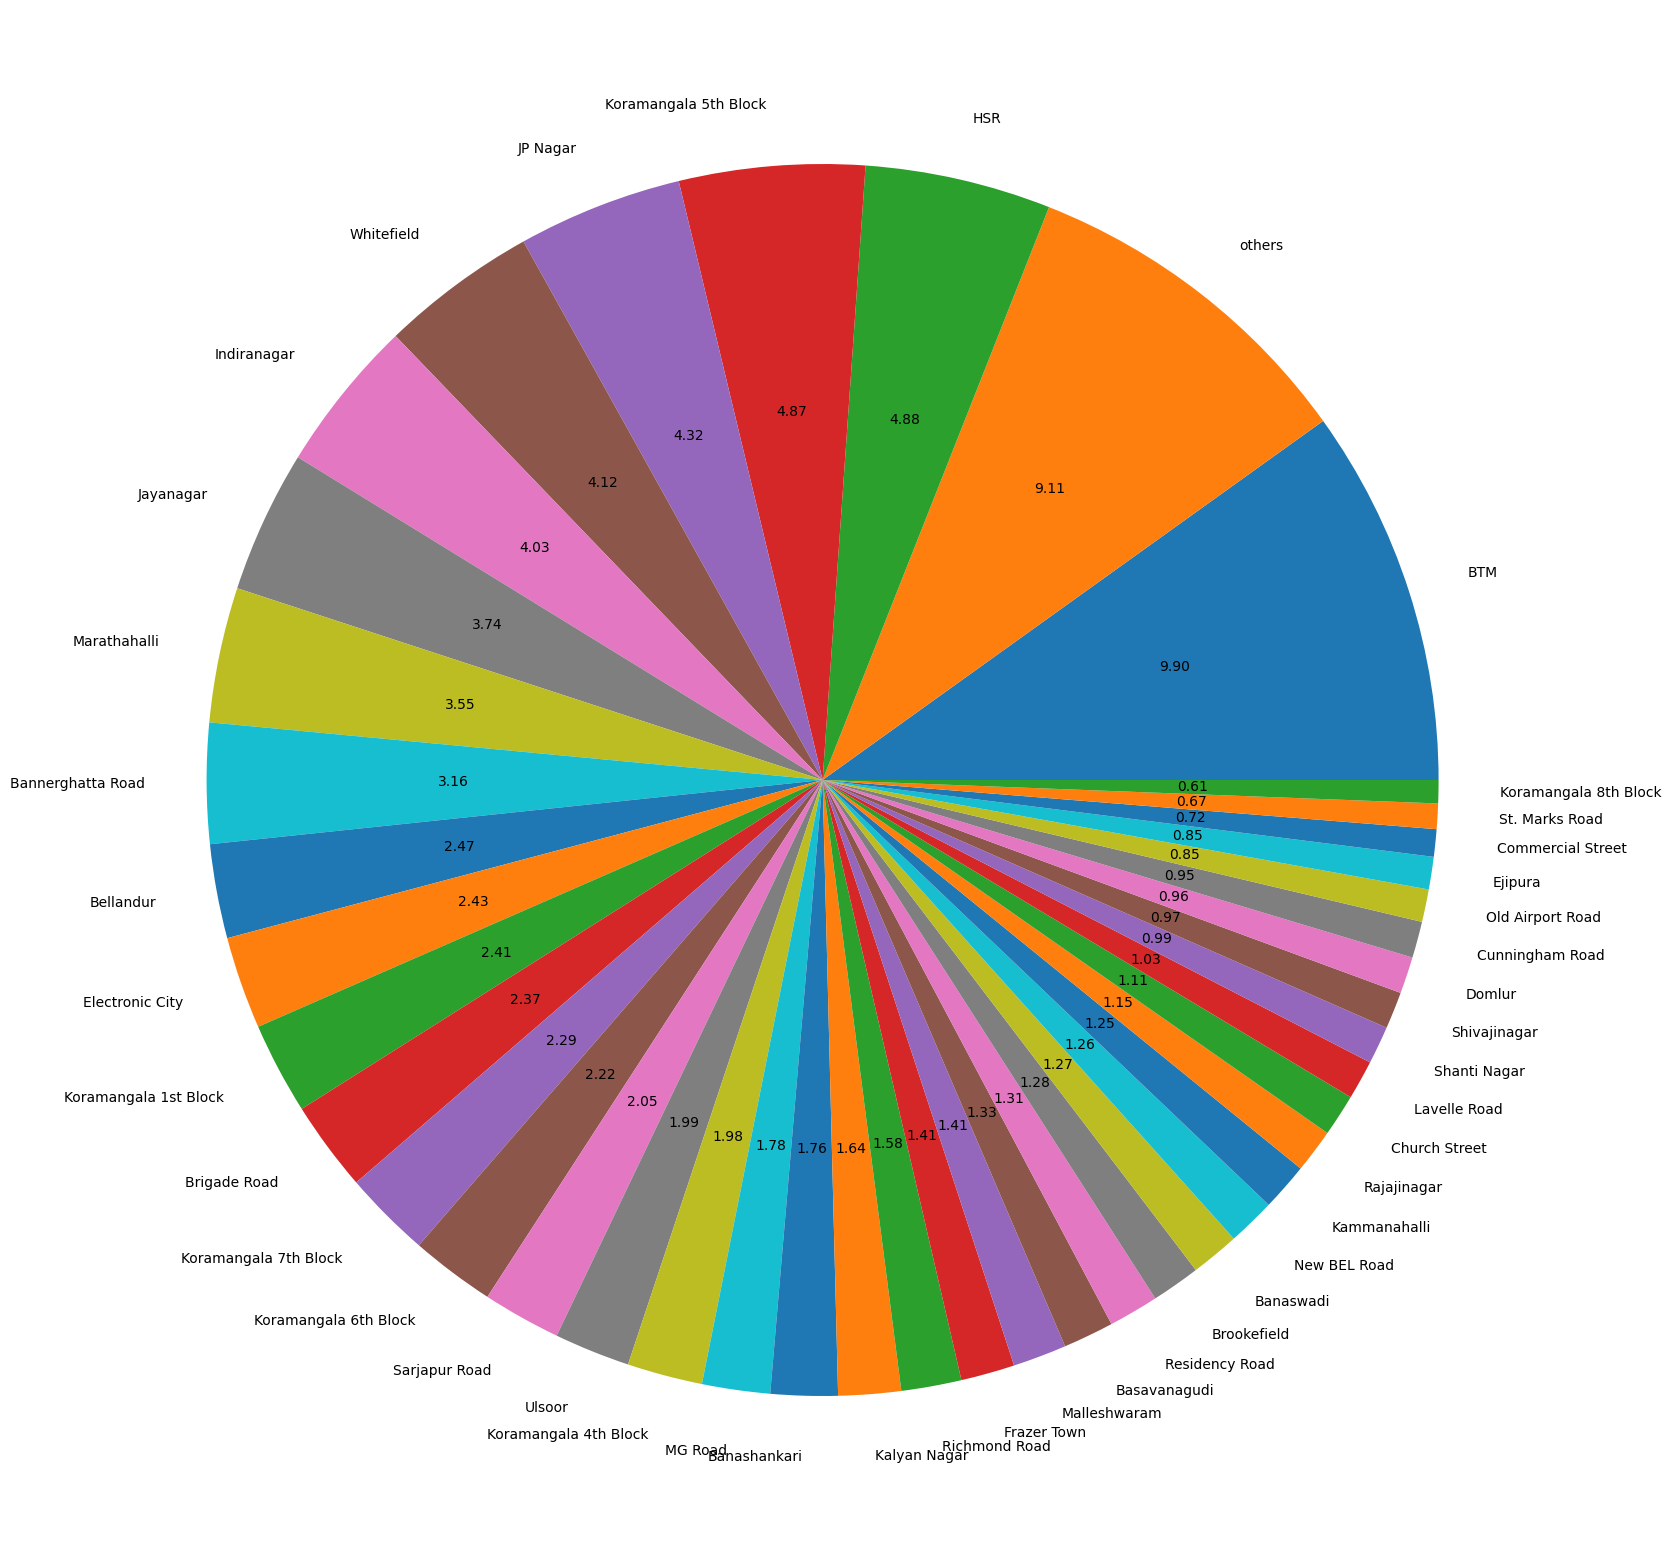

In [31]:
plt.figure(figsize=(20,20))
my_label=lis.index #
ax=plt.pie(lis,autopct="%.2f",labels=my_label)
plt.show()

# Data Visualization based on Location based on city Where hotels are located:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Banashankari'),
  Text(0, 1, 'Bannerghatta Road'),
  Text(0, 2, 'Basavanagudi'),
  Text(0, 3, 'Bellandur'),
  Text(0, 4, 'Brigade Road'),
  Text(0, 5, 'Brookefield'),
  Text(0, 6, 'BTM'),
  Text(0, 7, 'Church Street'),
  Text(0, 8, 'Electronic City'),
  Text(0, 9, 'Frazer Town'),
  Text(0, 10, 'HSR'),
  Text(0, 11, 'Indiranagar'),
  Text(0, 12, 'Jayanagar'),
  Text(0, 13, 'JP Nagar'),
  Text(0, 14, 'Kalyan Nagar'),
  Text(0, 15, 'Kammanahalli'),
  Text(0, 16, 'Koramangala 4th Block'),
  Text(0, 17, 'Koramangala 5th Block'),
  Text(0, 18, 'Koramangala 6th Block'),
  Text(0, 19, 'Koramangala 7th Block'),
  Text(0, 20, 'Lavelle Road'),
  Text(0, 21, 'Malleshwaram'),
  Text(0, 22, 'Marathahalli'),
  Text(0, 23, 'MG Road'),
  Text(0, 24, 'New BEL Road'),
  Text(0, 25, 'Old Airport Road'),
  Text(0, 26, 'Rajaj

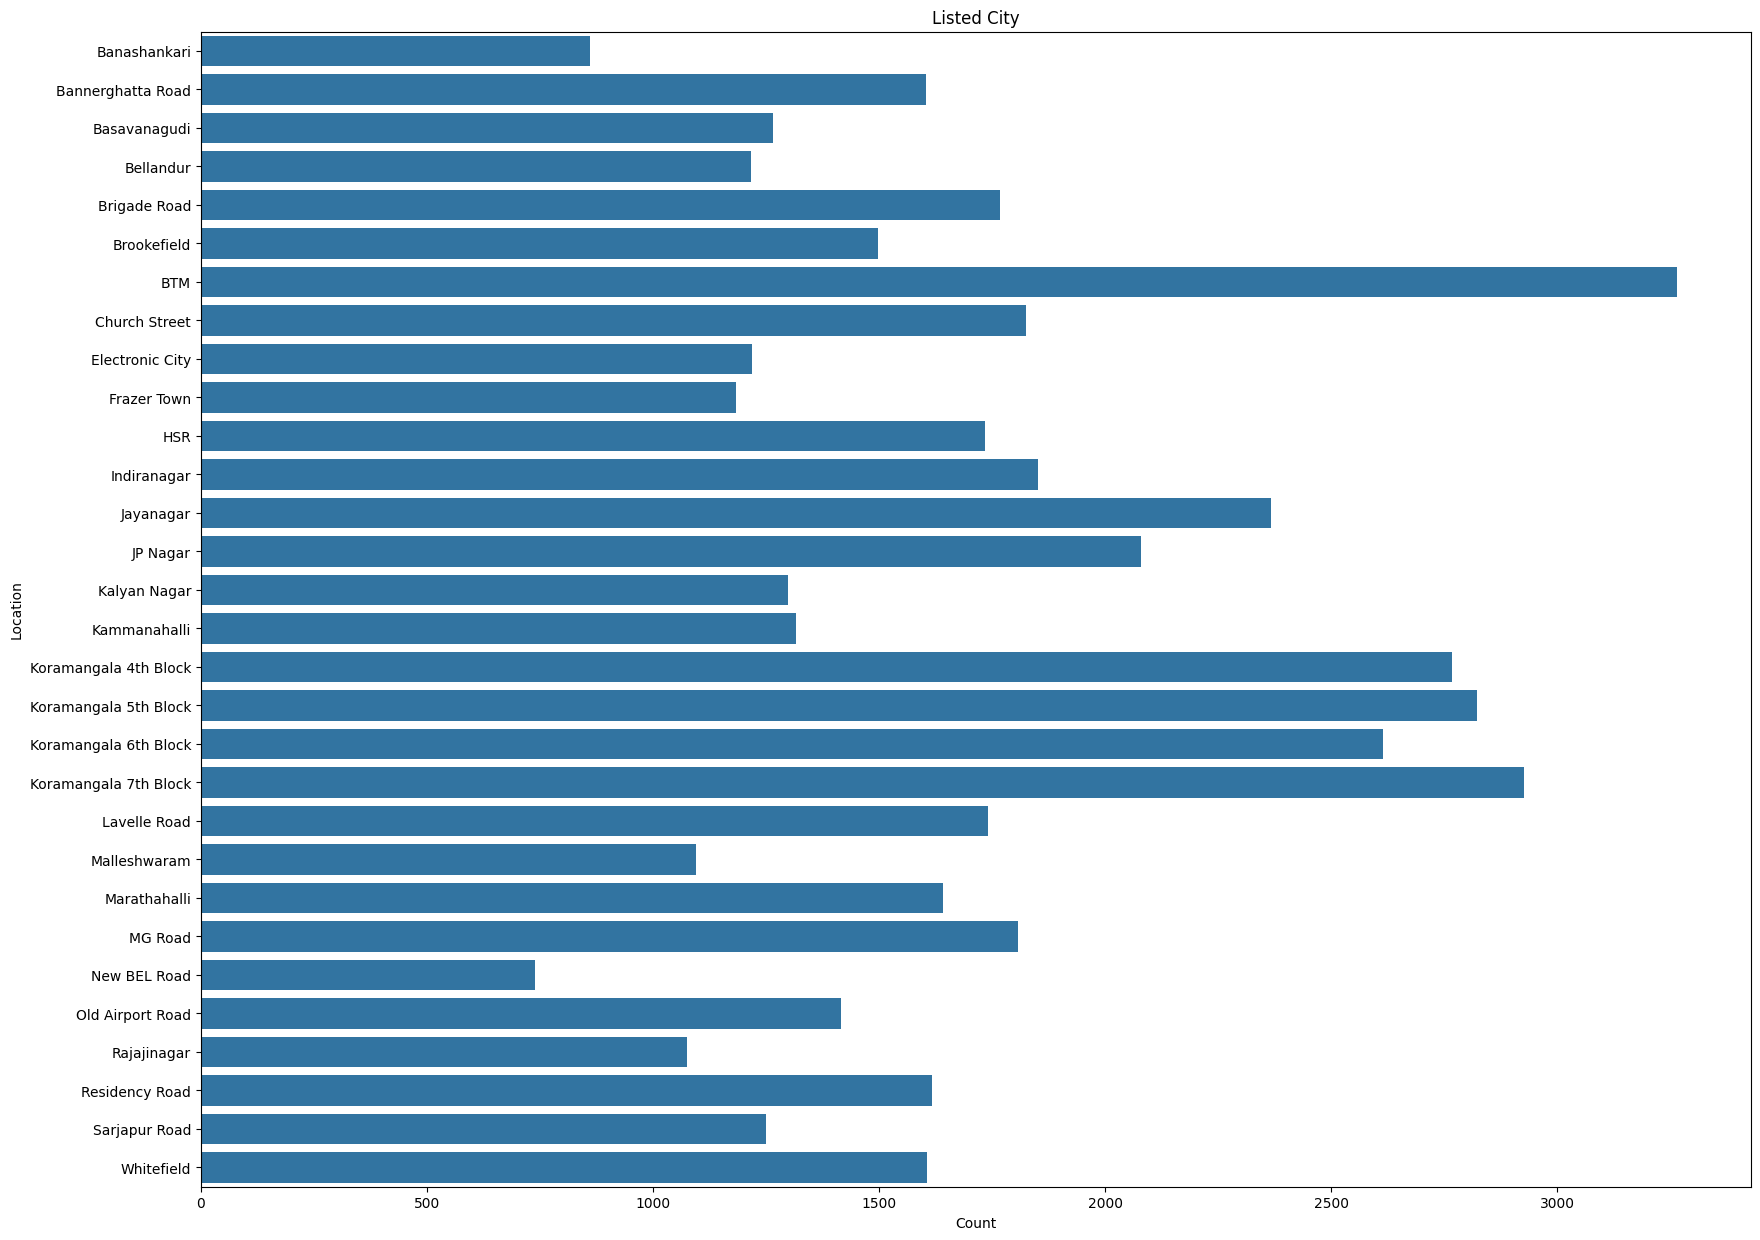

In [32]:
plt.figure(figsize = (20,15))
ax = sn.countplot(df['listed_city'])
plt.title("Listed City")
plt.xlabel("Count")
plt.ylabel("Location")
plt.yticks()

# Count on Each Restaurants Type

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

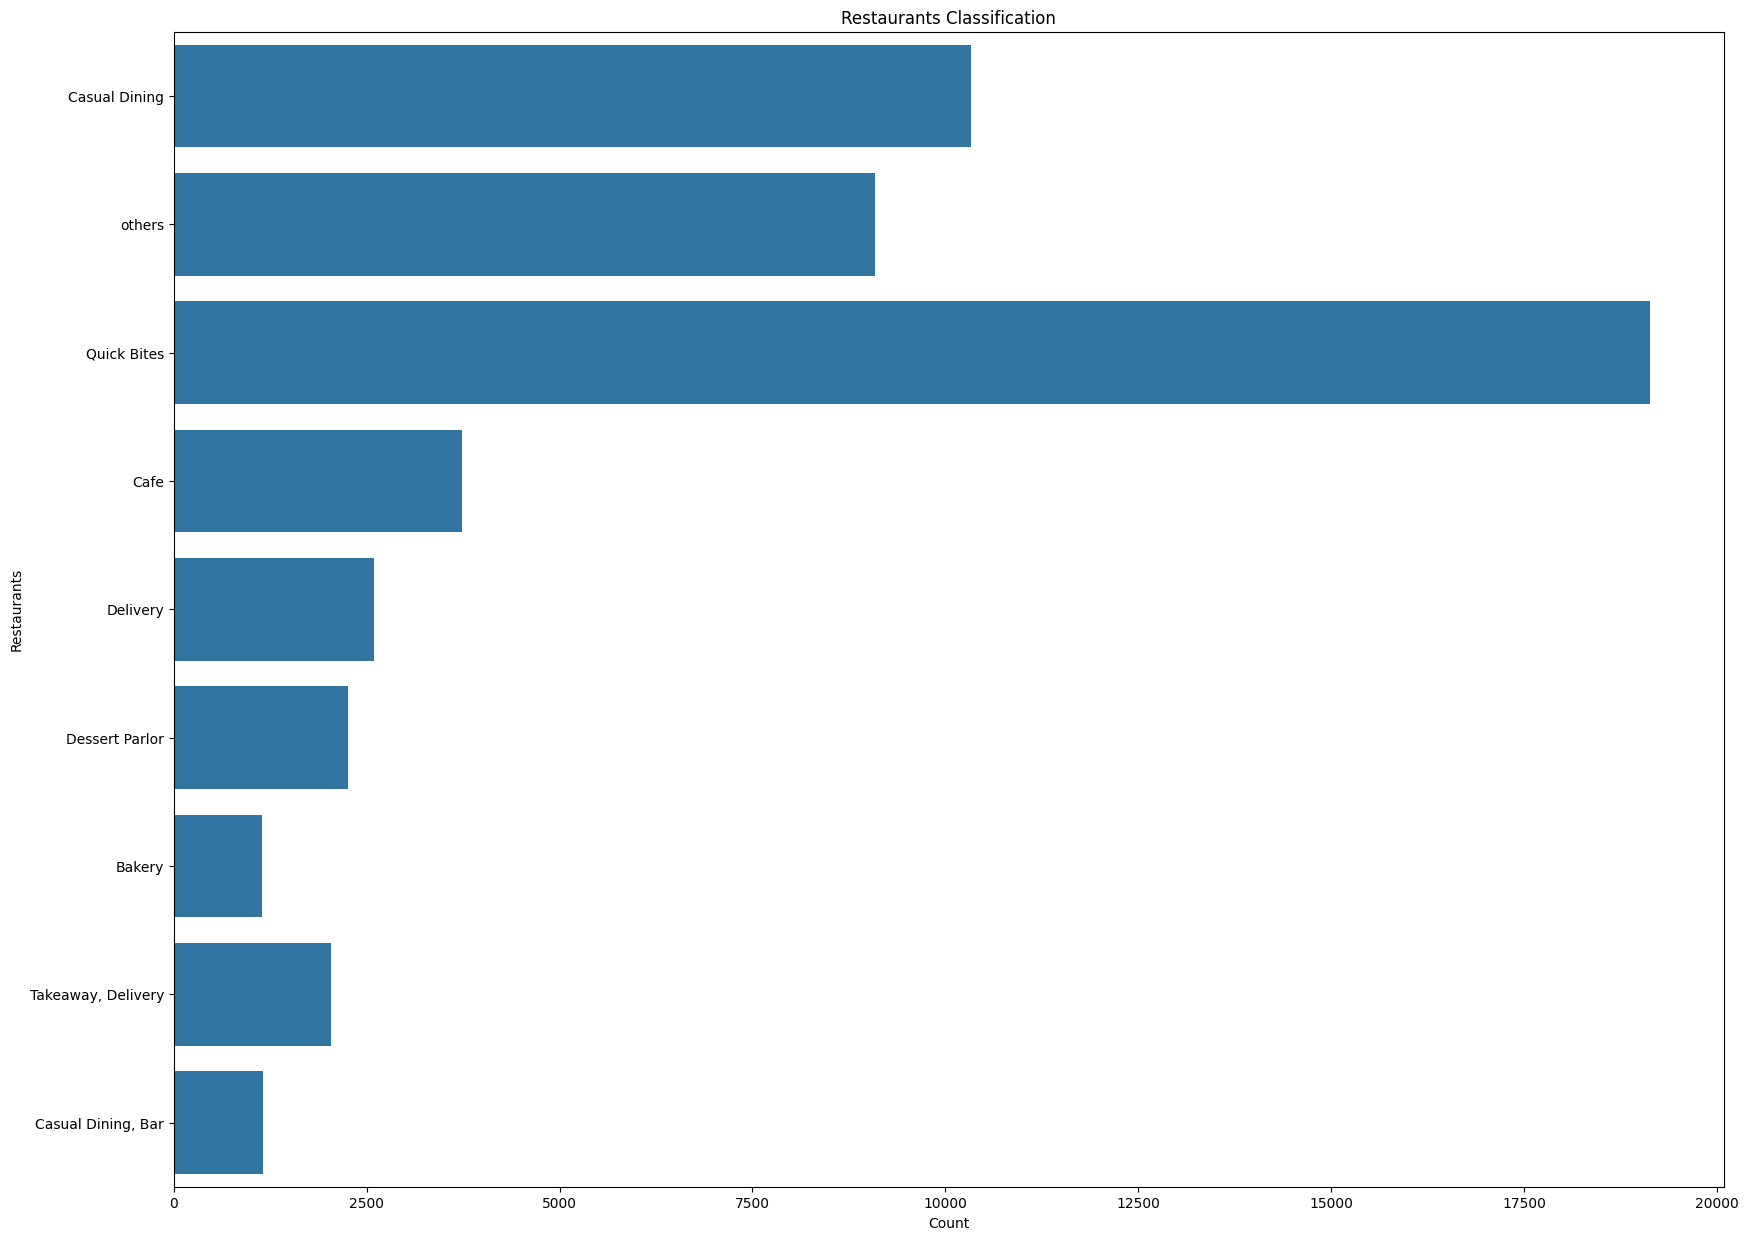

In [33]:
plt.figure(figsize = (20,15))
ax = sn.countplot(df['rest_type'])
plt.title("Restaurants Classification")
plt.xlabel("Count")
plt.ylabel("Restaurants")
plt.xticks()

In [34]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,listed_type,listed_city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari


# Restaurants Online and Table booking Statistics

Text(0, 0.5, 'Book Table')

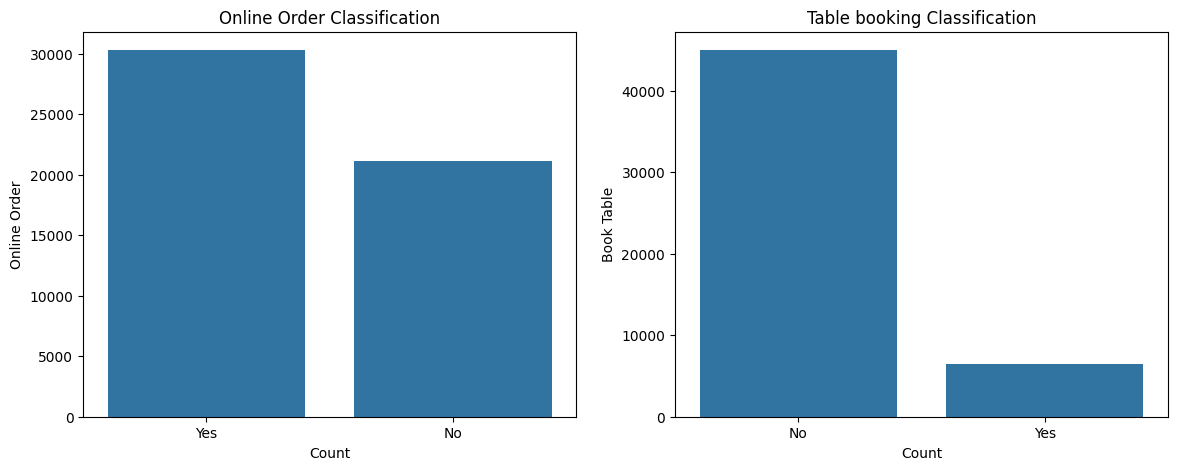

In [35]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
y_n_online_label=df["online_order"].value_counts() 
ax = sn.barplot(y_n_online_label)
plt.title("Online Order Classification")
plt.xlabel("Count")
plt.ylabel("Online Order")
plt.subplot(1,2,2)
y_n_book_label=df["book_table"].value_counts() 
ax = sn.barplot(y_n_book_label)
plt.title("Table booking Classification")
plt.xlabel("Count")
plt.ylabel("Book Table")

In [36]:
df0=df.groupby(['online_order','book_table'])['name'].count()
df0=df0.to_frame()
df0=pd.pivot_table(df0,index="online_order",columns='book_table')
df0

name        
book_table         No     Yes
online_order                 
No            18511.0  2644.0
Yes           26506.0  3805.0

In [37]:
df0["name"]["Yes"]

online_order
No     2644.0
Yes    3805.0
Name: Yes, dtype: float64

Text(0, 0.5, 'Booking table (Yes)')

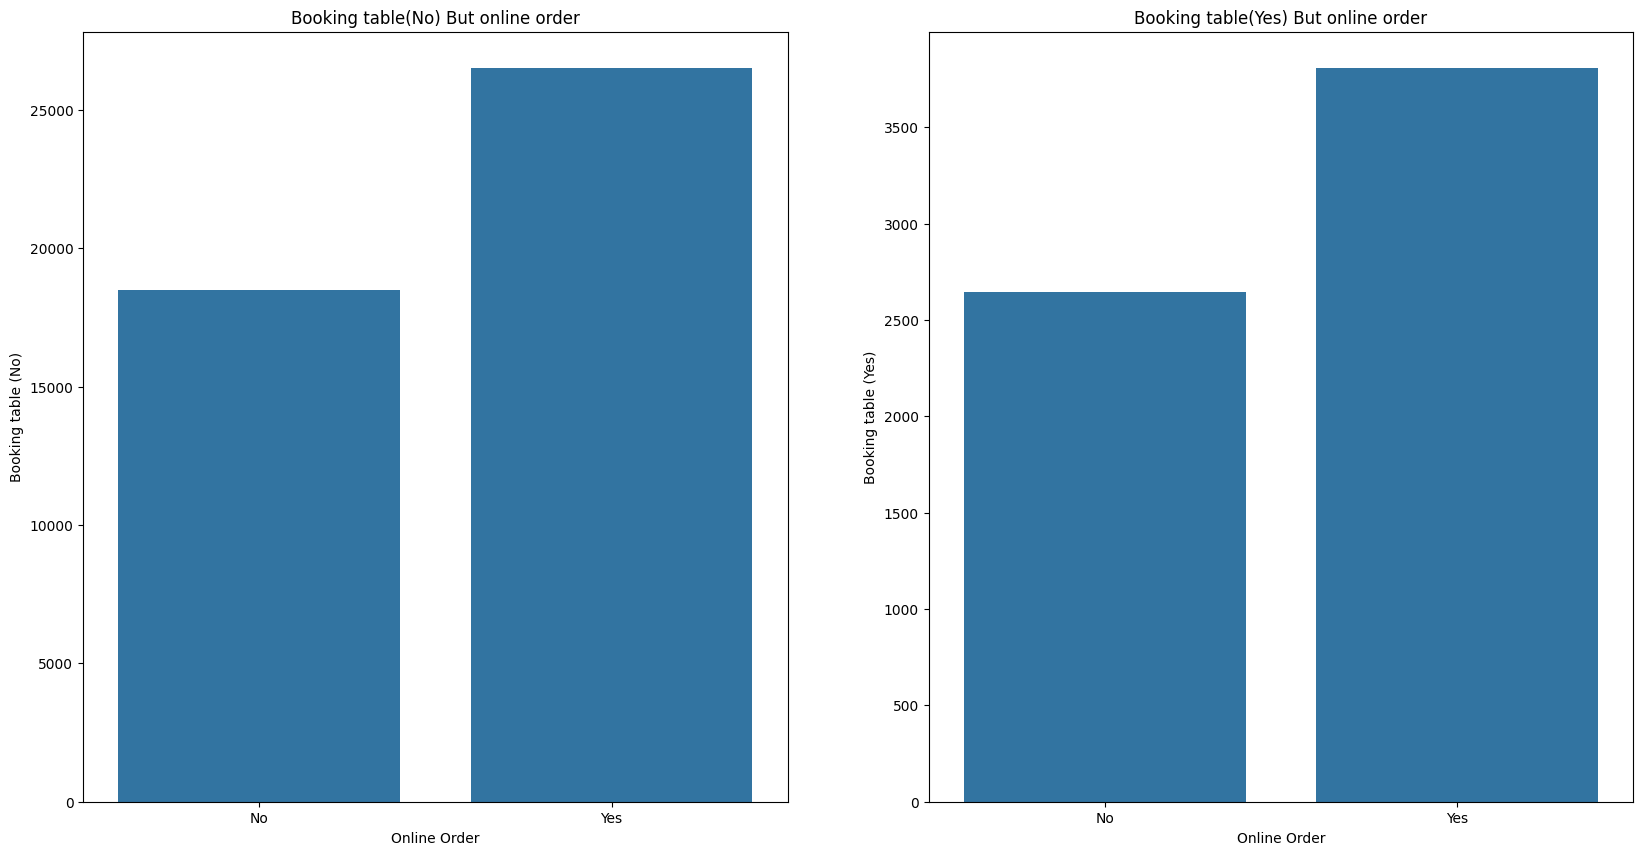

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sn.barplot(df0["name"]["No"])
plt.title("Booking table(No) But online order")
plt.xlabel("Online Order")
plt.ylabel("Booking table (No)")
plt.subplot(1,2,2)
sn.barplot(df0["name"]["Yes"])
plt.title("Booking table(Yes) But online order")
plt.xlabel("Online Order")
plt.ylabel("Booking table (Yes)")

# Classification based on Ratings

rate
3.702154    9961
3.900000    3969
3.800000    3867
3.700000    3817
3.600000    3289
4.000000    3176
4.100000    2948
3.500000    2768
3.400000    2468
3.300000    2301
4.200000    2184
3.200000    1854
4.300000    1693
3.100000    1555
4.400000    1147
3.000000    1003
2.900000     802
4.500000     656
2.800000     580
2.700000     304
4.600000     300
2.600000     252
4.700000     167
2.500000     101
2.400000      66
4.800000      66
4.900000      55
2.300000      51
2.200000      26
2.100000      24
2.000000      11
1.800000       5
Name: count, dtype: int64


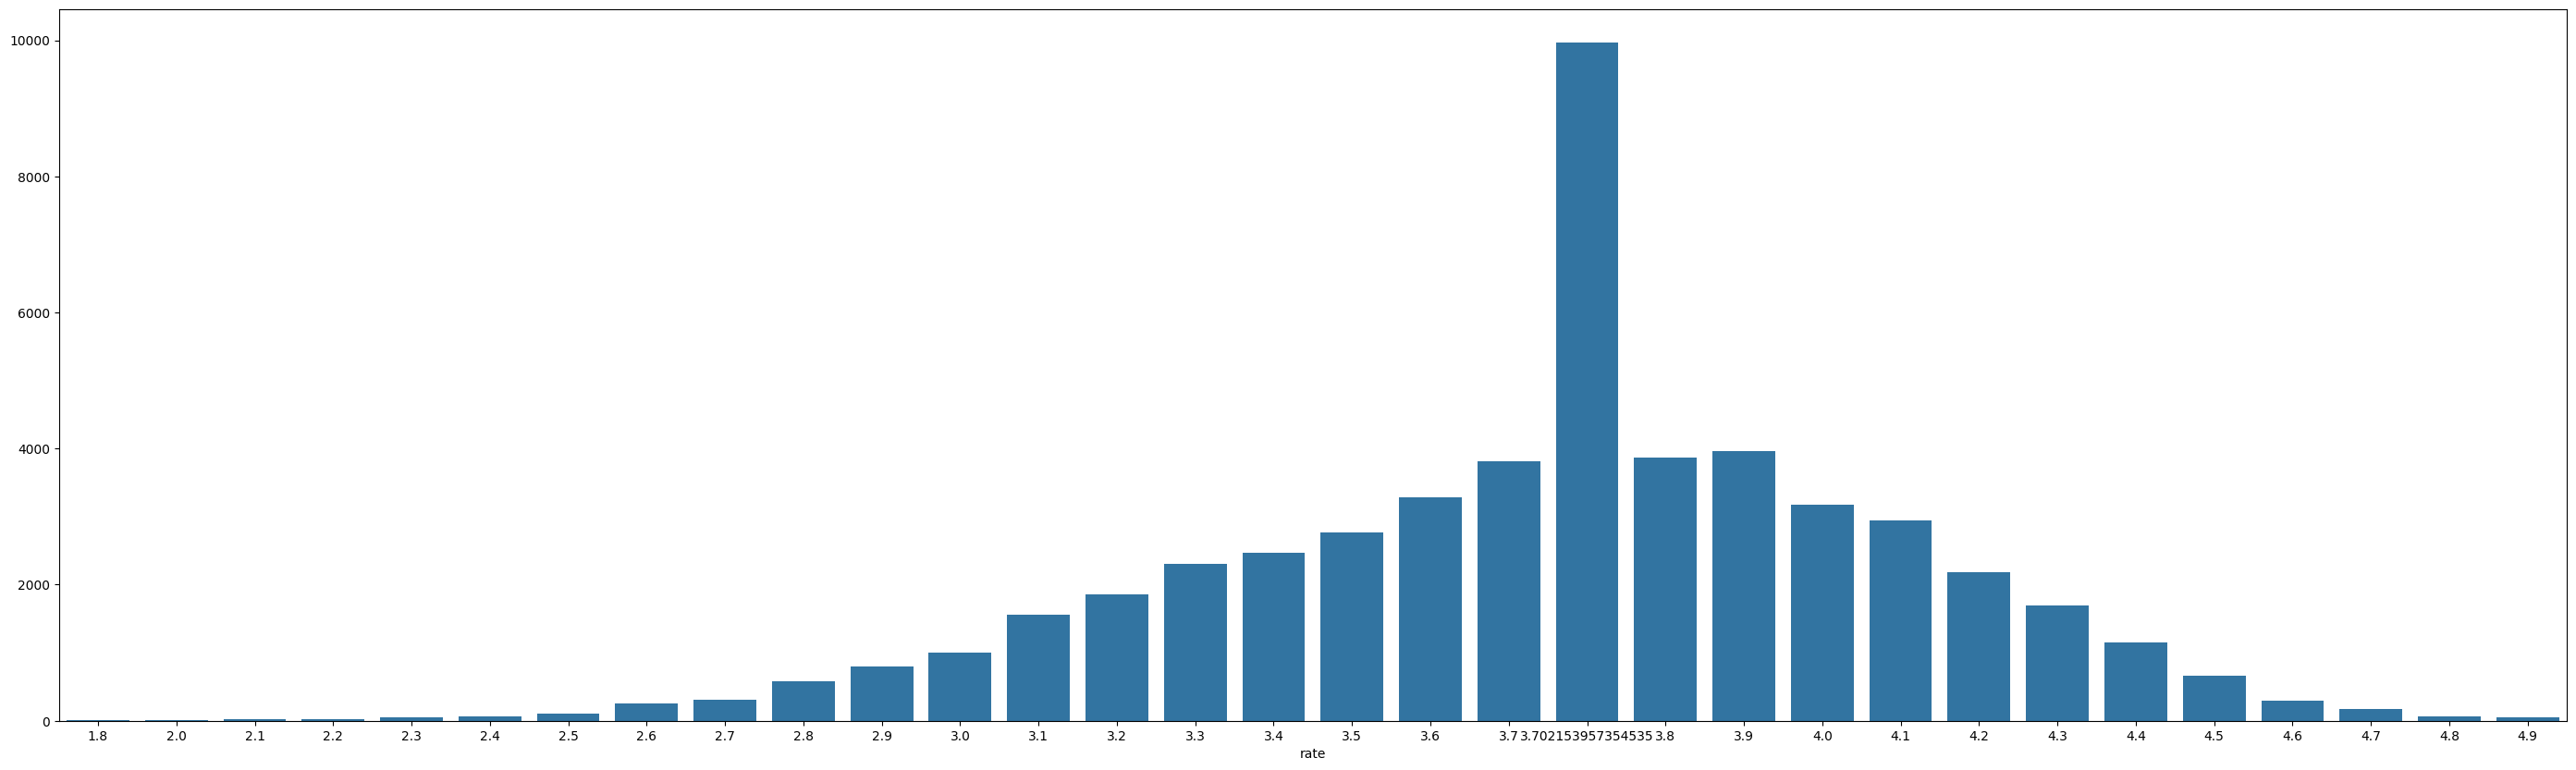

In [39]:
plt.figure(figsize=(35,10))
rate=df['rate'].value_counts()
sn.barplot(x=rate.index,y=rate.values)
print(df['rate'].value_counts())
plt.show()

# Compare Rating review with online order.

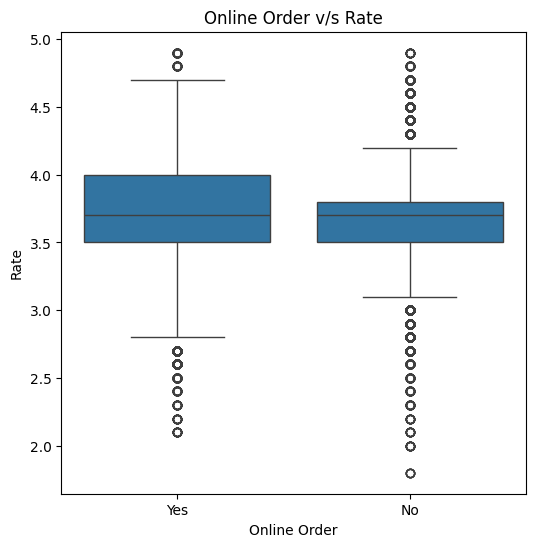

In [40]:
plt.figure(figsize = (6,6))
sn.boxplot(x = 'online_order', y = 'rate', data = df)
plt.title("Online Order v/s Rate")
plt.xlabel("Online Order")
plt.ylabel("Rate")
plt.show()

# Location wise Online order Performance

In [41]:
df1 = df.groupby(['location','online_order'])['name'].count() #Output will be in the format of series
df1=df1.to_frame() #Convert it into dataframe to use pivot table
df1=pd.pivot_table(df1,index=['location'], columns=['online_order'])
df1


name        
online_order               No     Yes
location                             
BTM                    1792.0  3305.0
Banashankari            397.0   507.0
Banaswadi               313.0   343.0
Bannerghatta Road       700.0   924.0
Basavanagudi            243.0   441.0
Bellandur               519.0   752.0
Brigade Road            553.0   665.0
Brookefield             241.0   417.0
Church Street           226.0   343.0
Commercial Street       228.0   142.0
Cunningham Road         168.0   323.0
Domlur                  261.0   235.0
Ejipura                 219.0   220.0
Electronic City         677.0   572.0
Frazer Town             295.0   432.0
HSR                     600.0  1911.0
Indiranagar             744.0  1332.0
JP Nagar                914.0  1308.0
Jayanagar               560.0  1364.0
Kalyan Nagar            353.0   491.0
Kammanahalli            268.0   375.0
Koramangala 1st Block   385.0   853.0
Koramangala 4th Block   459.0   558.0
Koramangala 5th Block   890.0  1614.0
Koramangala 6th Block   457.0   684.0
Koramangala 7th Block   395.0   786.0
Koramangala 8th Block   100.0   212.0
Lavelle Road            323.0   206.0
MG Road                 544.0   374.0
Malleshwaram            310.0   415.0
Marathahalli            718.0  1107.0
New BEL Road            257.0   389.0
Old Airport Road        224.0   216.0
Rajajinagar             286.0   305.0
Residency Road          427.0   248.0
Richmond Road           565.0   247.0
Sarjapur Road           332.0   725.0
Shanti Nagar            289.0   222.0
Shivajinagar            354.0   145.0
St. Marks Road          176.0   167.0
Ulsoor                  395.0   628.0
Whitefield              997.0  1123.0
others                 2001.0  2685.0

<Axes: xlabel='location'>

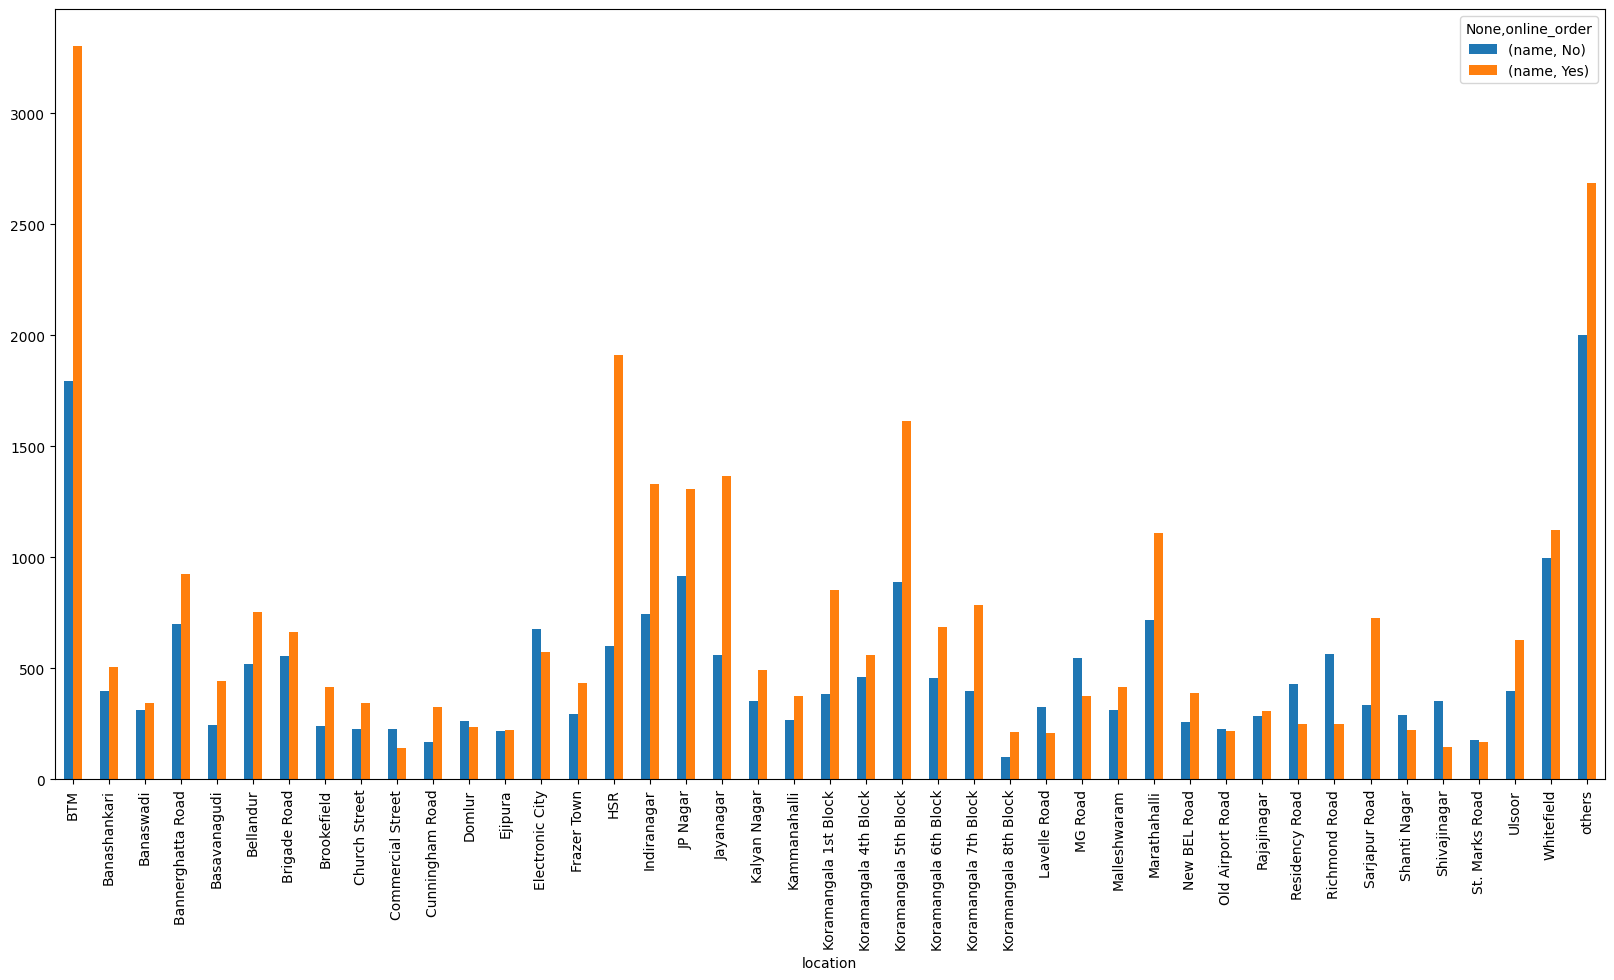

In [42]:
df1.plot(kind = 'bar', figsize = (20,10))

# Visualizing Types of Restaurents vs Rating

<Axes: xlabel='rest_type', ylabel='rate'>

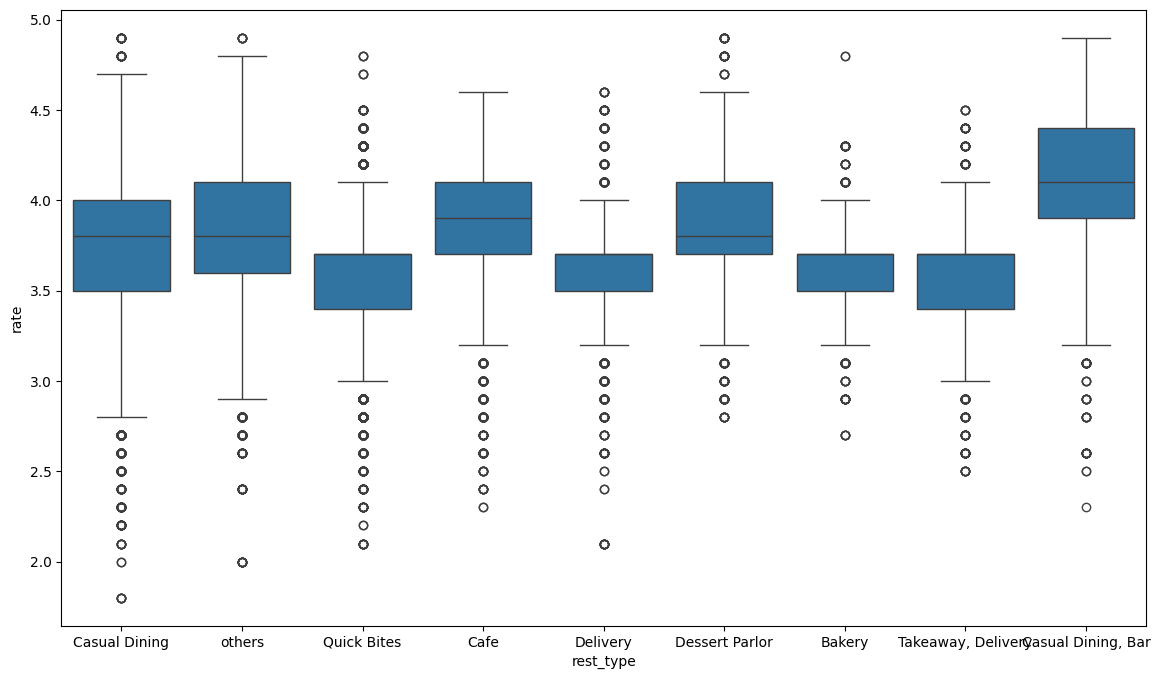

In [43]:
plt.figure(figsize = (14, 8))
sn.boxplot(x = 'rest_type', y = 'rate', data = df)

# Location wise count of restaurant type

In [44]:
df2 = df.groupby(['location','rest_type'])['name'].count() #Output will be in the format of series
df2=df2.to_frame() #Convert it into dataframe to use pivot table
df2=pd.pivot_table(df2,index=['location'], columns=['rest_type'])
df2


name                                                   \
rest_type             Bakery   Cafe Casual Dining Casual Dining, Bar Delivery   
location                                                                        
BTM                     77.0  291.0         711.0               22.0    254.0   
Banashankari            20.0   87.0         149.0                1.0     28.0   
Banaswadi               27.0   44.0         111.0                9.0     13.0   
Bannerghatta Road       53.0   79.0         317.0               10.0     69.0   
Basavanagudi            35.0   42.0          98.0                8.0      NaN   
Bellandur               16.0   55.0         295.0               28.0     60.0   
Brigade Road            30.0  111.0         291.0               26.0      NaN   
Brookefield             23.0   35.0         135.0               12.0      6.0   
Church Street            NaN   92.0         152.0               71.0      NaN   
Commercial Street        6.0   20.0          71.0                NaN      NaN   
Cunningham Road          3.0   46.0         203.0                NaN      4.0   
Domlur                  26.0   19.0          90.0               13.0     58.0   
Ejipura                  NaN    NaN          27.0                NaN     46.0   
Electronic City         39.0   43.0         283.0               19.0     61.0   
Frazer Town             33.0   35.0         153.0                NaN     63.0   
HSR                     33.0  141.0         542.0               23.0    186.0   
Indiranagar             28.0  202.0         483.0               52.0    172.0   
JP Nagar                63.0  159.0         543.0               53.0    126.0   
Jayanagar               59.0  201.0         489.0               18.0     14.0   
Kalyan Nagar            17.0   76.0         241.0                9.0     31.0   
Kammanahalli             2.0   52.0         143.0               10.0     24.0   
Koramangala 1st Block   42.0   97.0         102.0               57.0    108.0   
Koramangala 4th Block   33.0  138.0         179.0               44.0    121.0   
Koramangala 5th Block   28.0  361.0         560.0               81.0     51.0   
Koramangala 6th Block   14.0  109.0         217.0                NaN     80.0   
Koramangala 7th Block   25.0  117.0         284.0               59.0    102.0   
Koramangala 8th Block   10.0   31.0          10.0                NaN     50.0   
Lavelle Road            20.0    5.0          81.0              120.0     10.0   
MG Road                  3.0  102.0         172.0               40.0      6.0   
Malleshwaram            15.0   59.0         115.0               14.0      7.0   
Marathahalli            49.0   67.0         394.0               49.0    109.0   
New BEL Road             9.0   73.0         115.0                2.0     22.0   
Old Airport Road        23.0    9.0          72.0                8.0     32.0   
Rajajinagar             16.0    6.0         112.0               16.0     12.0   
Residency Road           NaN   58.0         152.0                9.0     14.0   
Richmond Road           10.0   51.0         203.0               14.0      8.0   
Sarjapur Road           52.0   50.0         198.0               17.0     97.0   
Shanti Nagar             6.0   46.0         146.0                NaN     13.0   
Shivajinagar             6.0   22.0          43.0               23.0      NaN   
St. Marks Road           NaN   20.0          95.0               60.0      NaN   
Ulsoor                  38.0  130.0         174.0               48.0     27.0   
Whitefield              58.0   65.0         459.0               37.0    139.0   
others                  94.0  286.0         916.0               72.0    372.0   

                                                                            
rest_type             Dessert Parlor Quick Bites Takeaway, Delivery others  
location                                                                    
BTM                            112.0      2733.0              334.

<Axes: xlabel='location'>

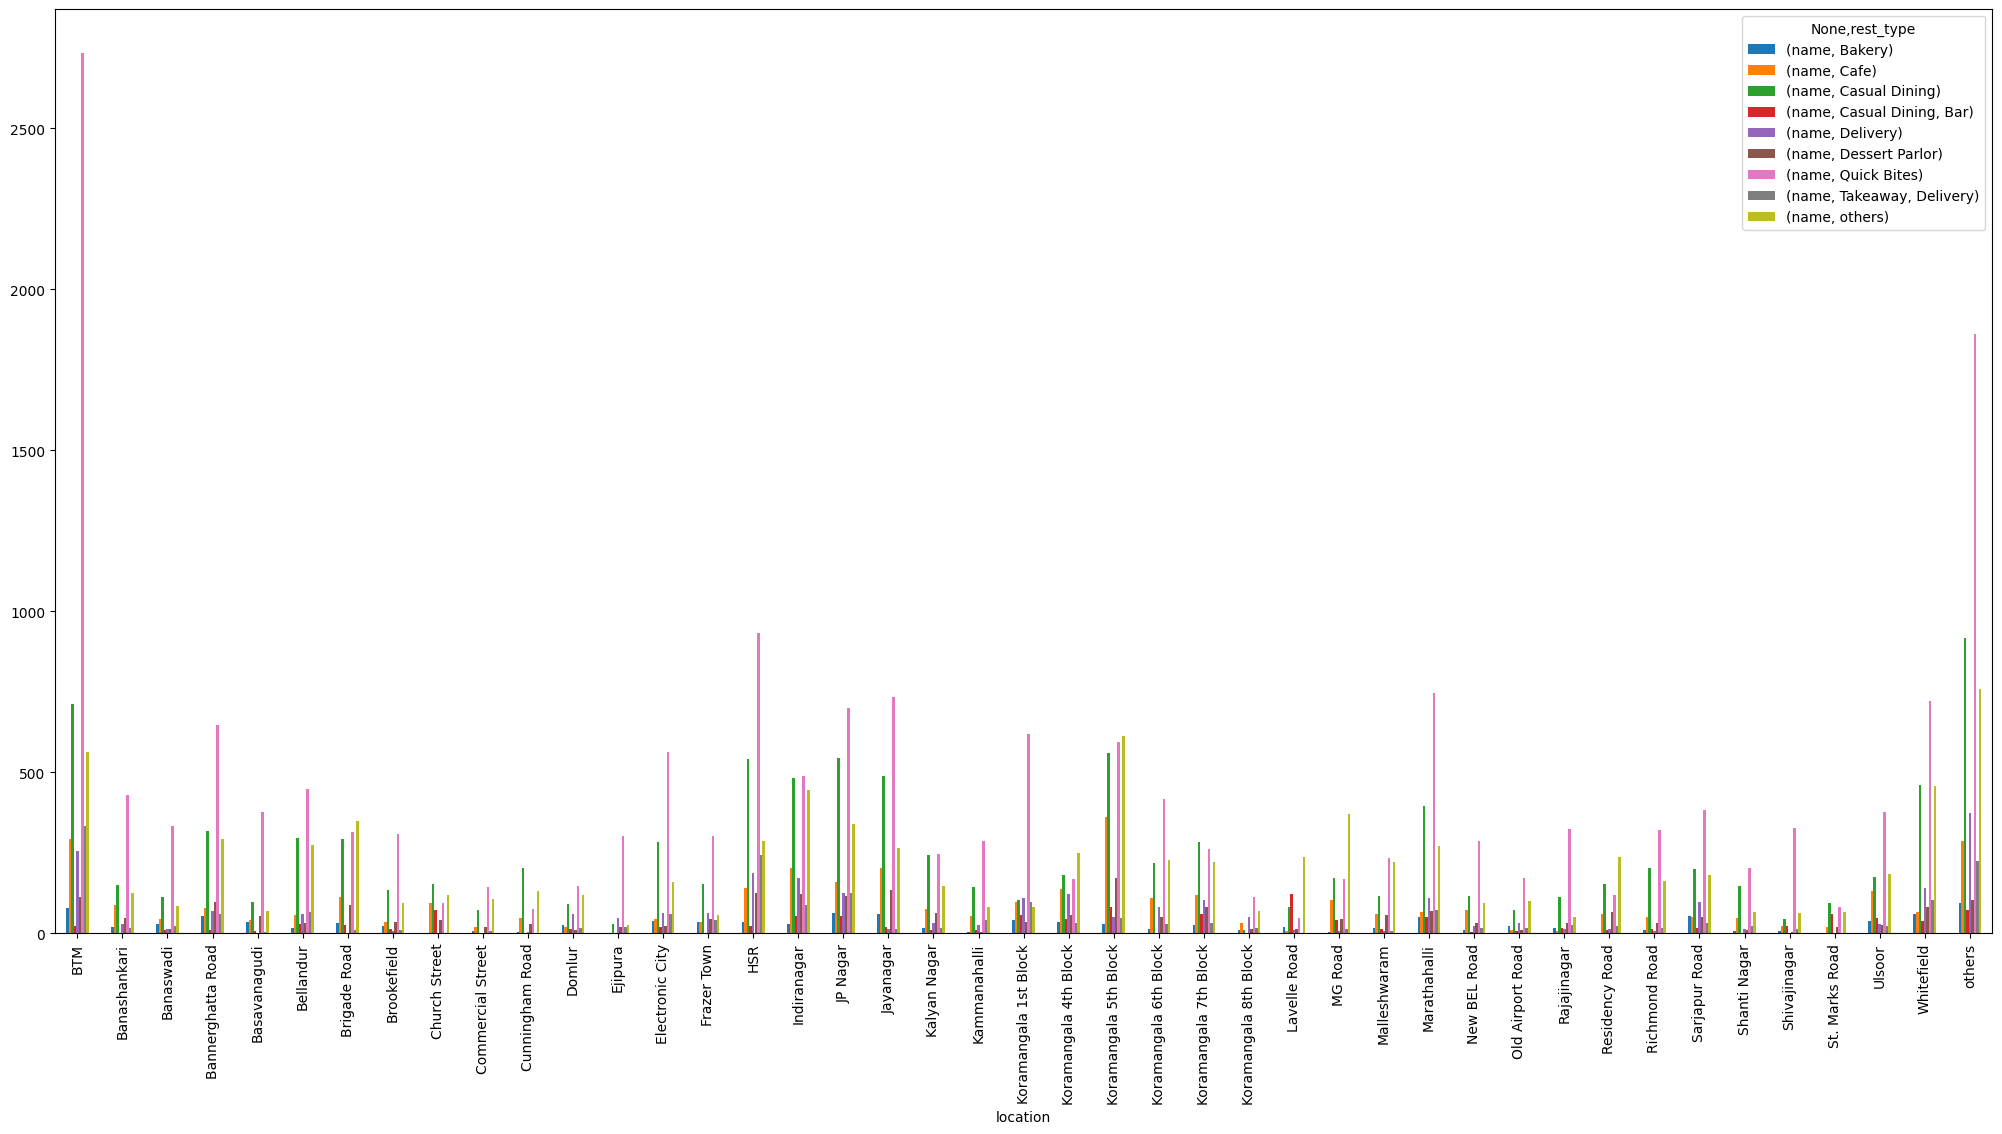

In [45]:
df2.plot(kind = 'bar', figsize = (25,12))


# Sales cost based Each location 

In [46]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'listed_type', 'listed_city'],
      dtype='object')

In [47]:
df3=df.groupby(["location"]).sum()
df3.reset_index(inplace=True)
df3.drop(['name', 'online_order', 'book_table', 'rate', 'votes','rest_type', 'cuisines', 'listed_type', 'listed_city'] ,axis=1,inplace=True)
df3.sort_values(by="approx_cost",ascending=False)

,location,approx_cost
42,others,2.396234e+06
0,BTM,2.021117e+06
23,Koramangala 5th Block,1.659339e+06
16,Indiranagar,1.354330e+06
41,Whitefield,1.271176e+06
15,HSR,1.198871e+06
17,JP Nagar,1.164148e+06
28,MG Road,1.046545e+06
30,Marathahalli,9.386027e+05
18,Jayanagar,9.178983e+05


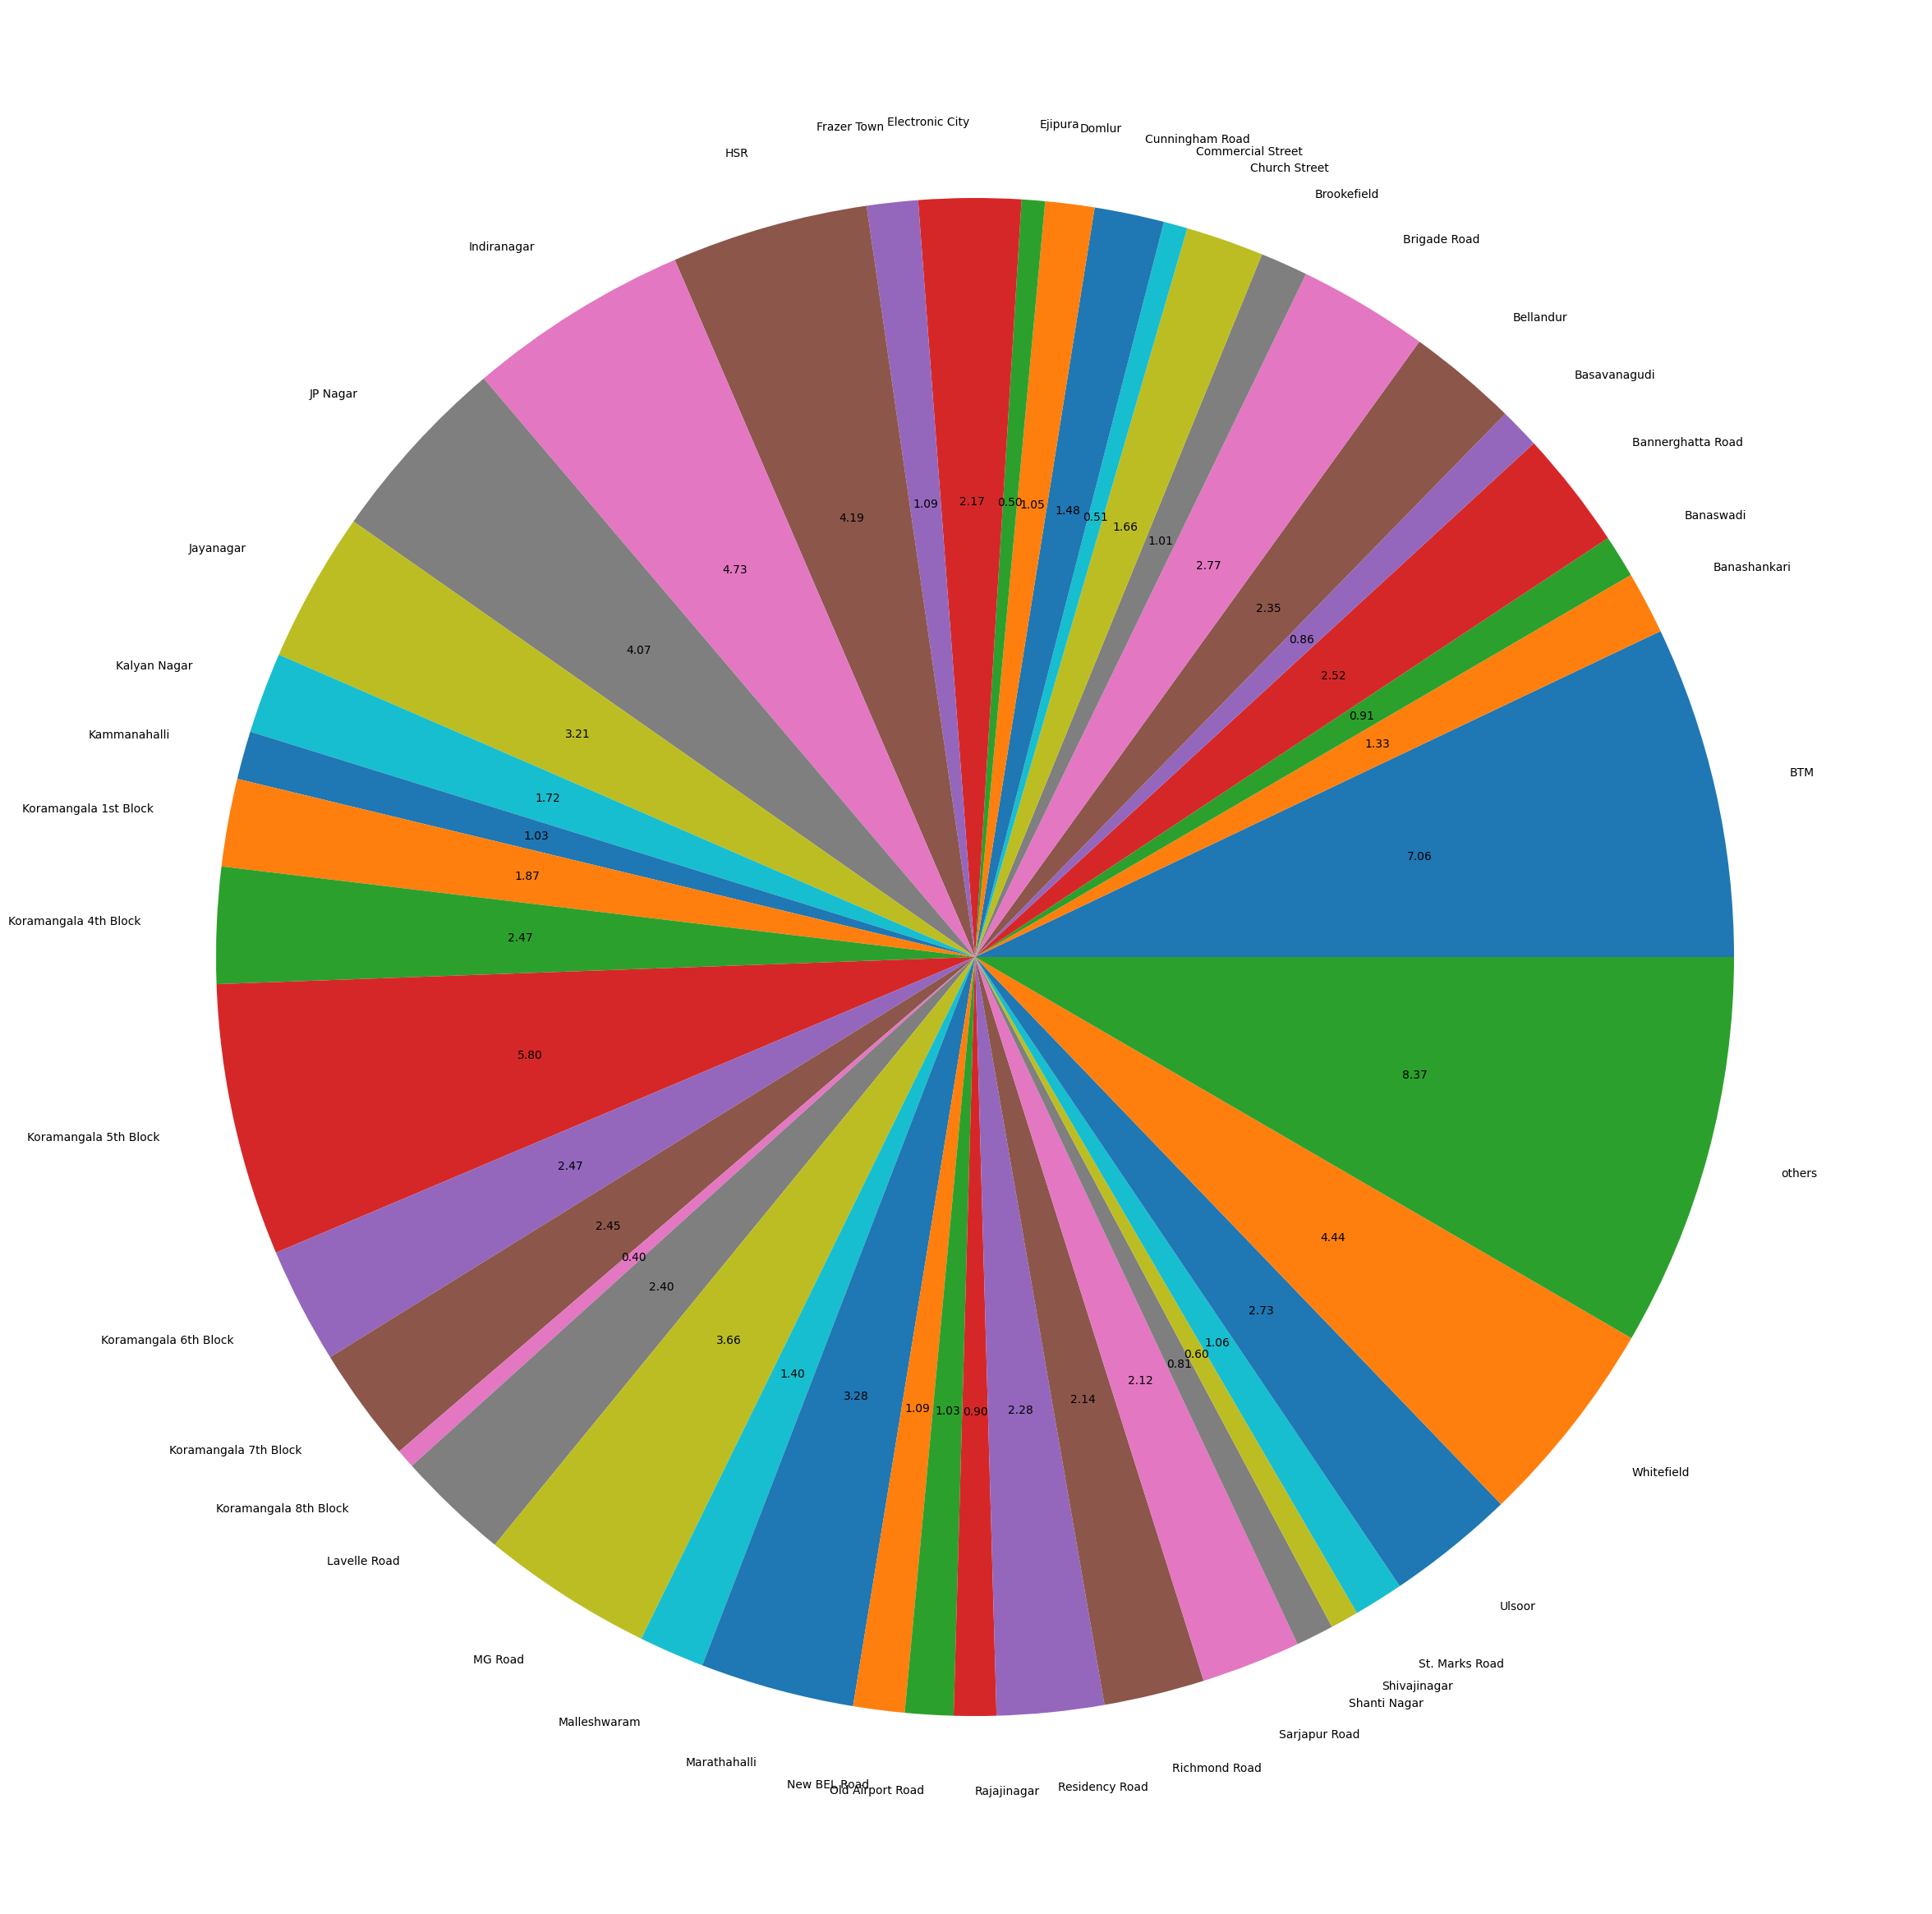

In [64]:
plt.figure(figsize=(50,30))
ax=plt.pie(df3["approx_cost"],autopct="%.2f",labels=df3["location"])
plt.show()

# Sales cost based Each Restaurant type

In [48]:
df4=df.groupby(["rest_type"]).sum()
df4.reset_index(inplace=True)
df4.drop(['location','name', 'online_order', 'book_table', 'rate', 'votes', 'cuisines', 'listed_type', 'listed_city'] ,axis=1,inplace=True)
df4.sort_values(by="approx_cost",ascending=False)

,rest_type,approx_cost
2,Casual Dining,8.153570e+06
8,others,7.523917e+06
6,Quick Bites,6.092712e+06
1,Cafe,2.311472e+06
3,"Casual Dining, Bar",1.430559e+06
4,Delivery,1.125812e+06
7,"Takeaway, Delivery",8.010829e+05
5,Dessert Parlor,7.556927e+05
0,Bakery,4.225300e+05


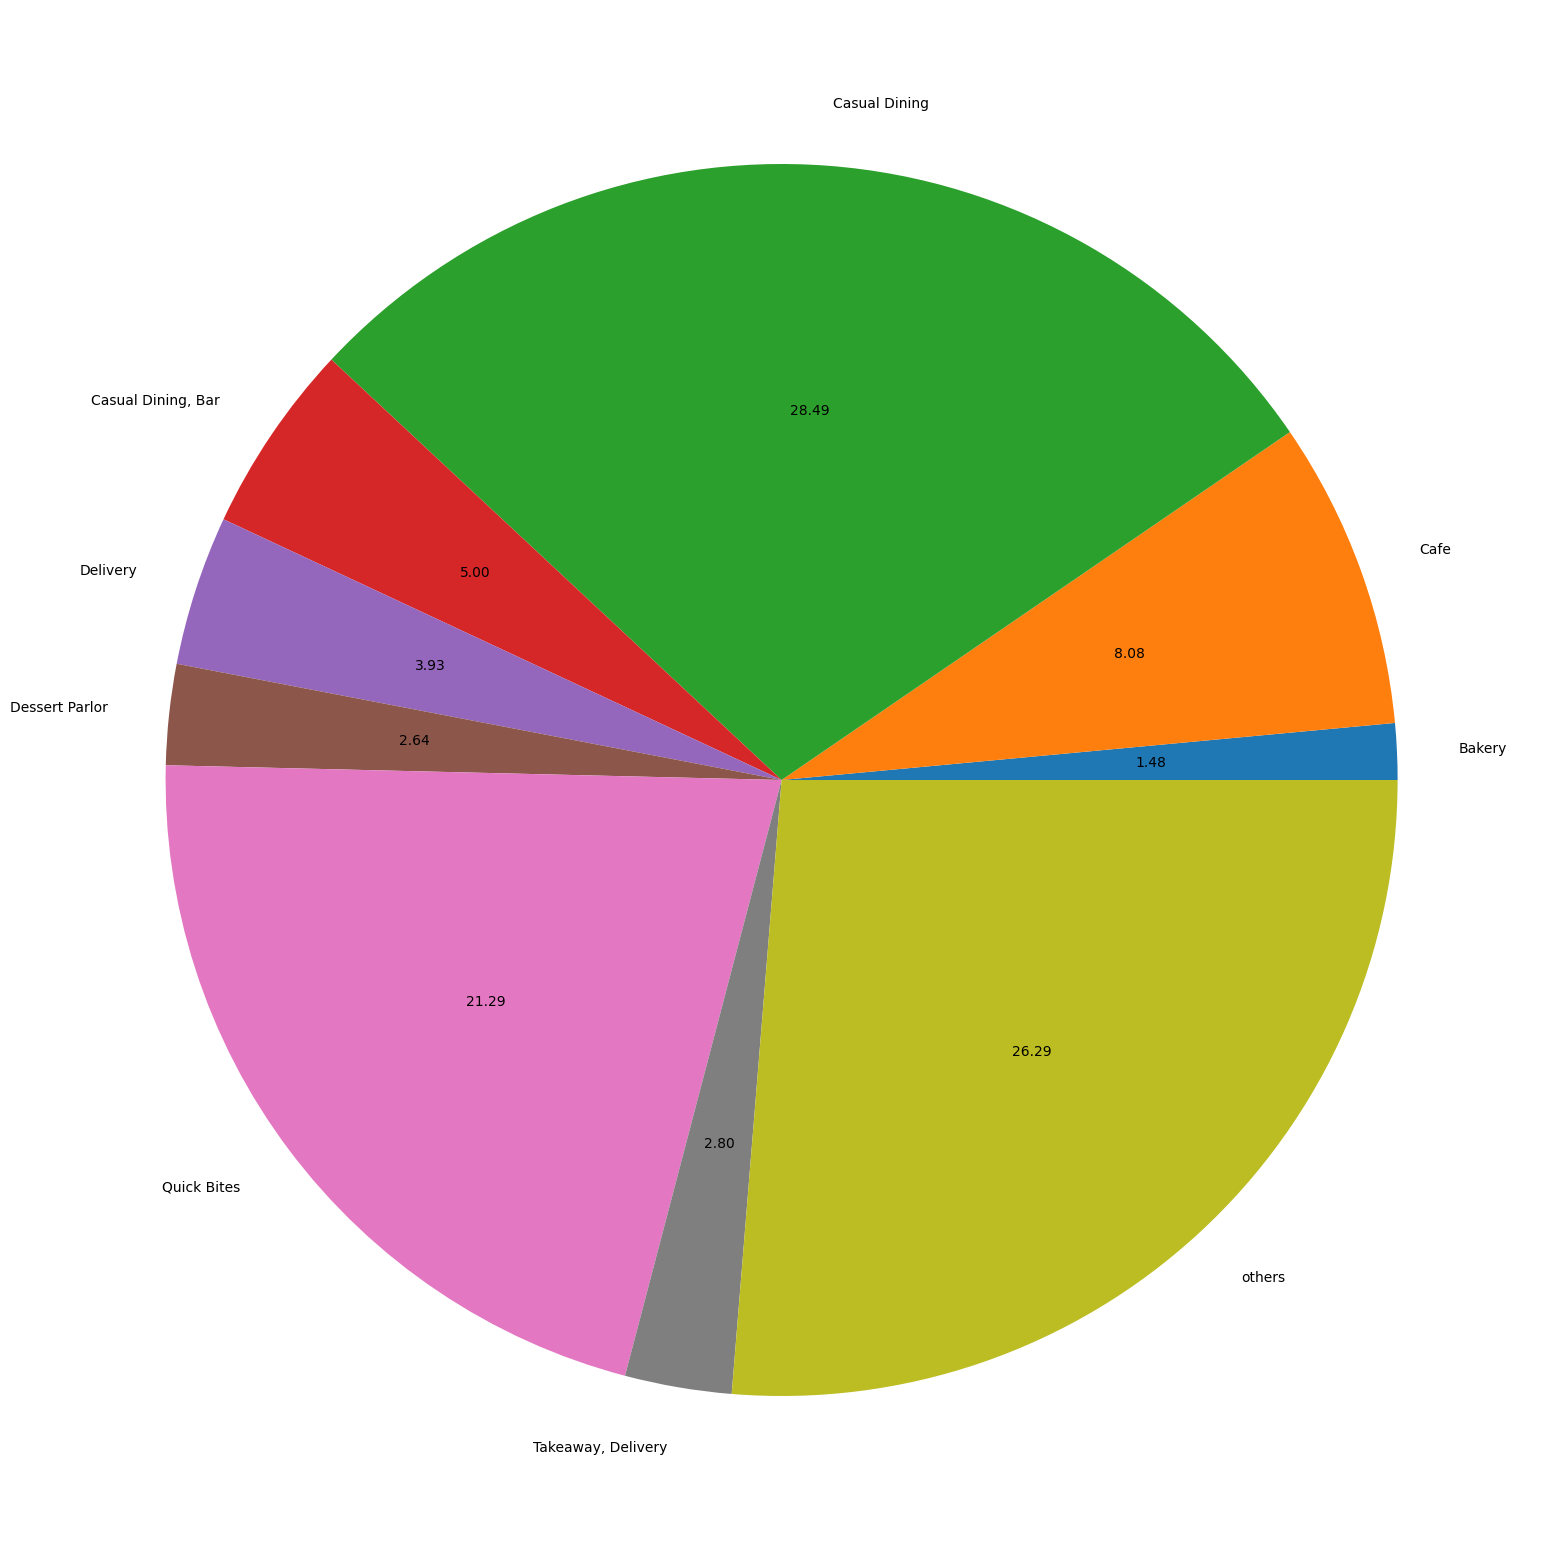

In [53]:
plt.figure(figsize=(20,20))
ax=plt.pie(df4["approx_cost"],autopct="%.2f",labels=df4["rest_type"])
plt.show()